In [1]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

In [2]:
feat_file=pd.read_csv('cancer_preprocess.csv')

In [3]:
feat_file.head()

,A1_0,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,...,E5_118,E5_119,E5_120,E5_121,E5_122,E5_123,E5_124,E5_125,E5_126,E5_127
0,0.183793,0.239916,0.850030,0.210690,0.896150,0.866617,0.860076,0.115359,0.374133,0.927302,...,0.793461,0.576311,0.189772,0.784201,0.335585,0.644900,0.301631,0.547792,0.479534,0.308149
1,0.908285,0.882967,0.804499,0.167710,0.854424,0.773797,0.818178,0.146237,0.822128,0.880442,...,0.792318,0.645596,0.668128,0.267654,0.732278,0.791278,0.680896,0.315371,0.368137,0.192646
2,0.187789,0.896291,0.089300,0.872091,0.140625,0.809294,0.833710,0.439762,0.836772,0.120445,...,0.594850,0.744443,0.246511,0.767050,0.736697,0.710731,0.586913,0.777560,0.706049,0.311375
3,0.911319,0.907869,0.831656,0.767504,0.886981,0.589135,0.704022,0.613958,0.852084,0.481431,...,0.593676,0.227899,0.264702,0.535805,0.480239,0.731689,0.799642,0.856727,0.824530,0.582091
4,0.181163,0.800212,0.827693,0.149731,0.739144,0.843704,0.841885,0.127548,0.112236,0.898438,...,0.391759,0.808125,0.147298,0.859803,0.620034,0.734427,0.126441,0.508898,0.552177,0.360427


In [4]:
feat_file.shape

(2129, 3200)

In [5]:
X=feat_file.values

In [6]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [7]:
y=label.values.ravel()

# split


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [9]:
X_train.shape

(1703, 3200)

In [10]:
X_train_filtered=pd.read_csv('min_acqui_20(15)_train.csv')

In [11]:
X_train_filtered.head()

,E4_89,E4_28,E4_84,C1_97,D1_98,E1_40,E3_86,E3_84,E5_99,D4_84,B5_114,B2_98,B4_100,B1_10,C5_110
0,0.786429,0.561138,0.258345,0.248749,0.021182,0.599582,0.454504,0.715381,0.755007,0.173080,0.263680,0.564490,0.797628,0.110611,0.274015
1,0.859290,0.852287,0.311888,0.196984,0.784381,0.146209,0.256918,0.795471,0.544956,0.110214,0.153174,0.737769,0.224427,0.761057,0.191864
2,0.143003,0.746479,0.418028,0.898705,0.814408,0.217695,0.430020,0.496394,0.489269,0.135345,0.394745,0.364919,0.150245,0.710013,0.326009
3,0.866164,0.822966,0.611352,0.231740,0.895338,0.208094,0.139817,0.492059,0.352601,0.146327,0.160720,0.083903,0.192012,0.826963,0.388578
4,0.387573,0.158970,0.264245,0.230294,0.562063,0.385392,0.760659,0.838540,0.212667,0.163507,0.732251,0.671126,0.153444,0.823512,0.261580


In [12]:
X_test_filtered=pd.read_csv('min_acqui_20(15)_test.csv')

In [13]:
X_test_filtered.head()

,E4_89,E4_28,E4_84,C1_97,D1_98,E1_40,E3_86,E3_84,E5_99,D4_84,B5_114,B2_98,B4_100,B1_10,C5_110
0,0.874179,0.873852,0.200238,0.175636,0.855091,0.296361,0.322225,0.676283,0.421249,0.151439,0.250993,0.606397,0.139666,0.626038,0.277871
1,0.747822,0.815728,0.269469,0.532944,0.746239,0.348138,0.624252,0.876427,0.487525,0.147516,0.367832,0.507946,0.139218,0.809413,0.185769
2,0.145007,0.612936,0.431691,0.204306,0.905475,0.920974,0.384639,0.552976,0.230539,0.117669,0.291854,0.532184,0.554220,0.640466,0.220049
3,0.135729,0.431600,0.301753,0.771572,0.849031,0.547933,0.749096,0.849332,0.577864,0.119563,0.357084,0.782663,0.340001,0.089889,0.241542
4,0.443421,0.547341,0.446868,0.216046,0.809537,0.327387,0.732435,0.814533,0.114572,0.139217,0.479699,0.323070,0.133860,0.806045,0.259948


## RFC

In [14]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values=forest.predict_proba(X_test_filtered)

In [15]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[131  68]
 [ 73 154]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6422    0.6583    0.6501       199
           1     0.6937    0.6784    0.6860       227

    accuracy                         0.6690       426
   macro avg     0.6679    0.6684    0.6680       426
weighted avg     0.6696    0.6690    0.6692       426



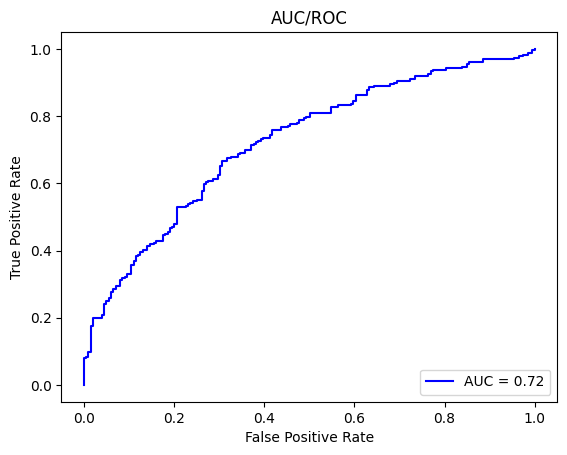

In [16]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)
y_prediction_values=KNN.predict_proba(X_test_filtered)

In [18]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa=knn_kappa_train
knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[127  72]
 [ 75 152]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6287    0.6382    0.6334       199
           1     0.6786    0.6696    0.6741       227

    accuracy                         0.6549       426
   macro avg     0.6536    0.6539    0.6537       426
weighted avg     0.6553    0.6549    0.6551       426



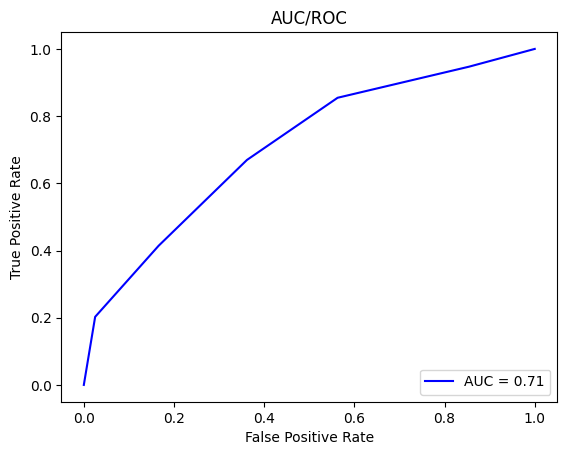

In [19]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [20]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)
y_prediction_values=model.predict_proba(X_test_filtered)

In [21]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
svc_kappa=knn_kappa_train
svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
svc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[129  70]
 [ 74 153]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6355    0.6482    0.6418       199
           1     0.6861    0.6740    0.6800       227

    accuracy                         0.6620       426
   macro avg     0.6608    0.6611    0.6609       426
weighted avg     0.6624    0.6620    0.6622       426



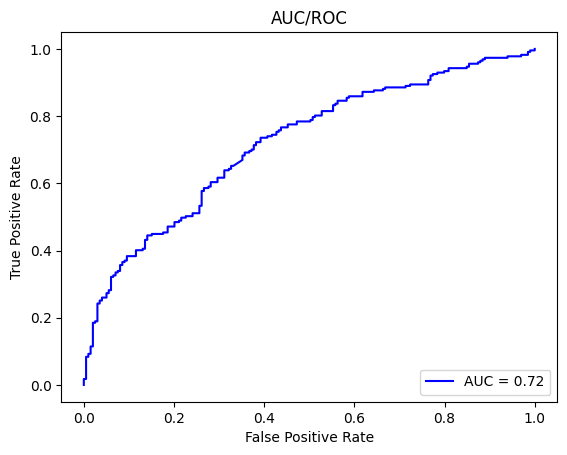

In [22]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)
y_prediction_values=lr.predict_proba(X_test_filtered)

In [24]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
lr_kappa=knn_kappa_train
lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
lr_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[134  65]
 [ 76 151]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6381    0.6734    0.6553       199
           1     0.6991    0.6652    0.6817       227

    accuracy                         0.6690       426
   macro avg     0.6686    0.6693    0.6685       426
weighted avg     0.6706    0.6690    0.6694       426



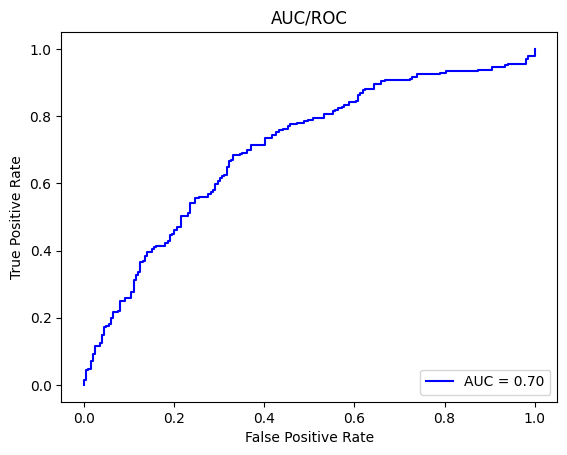

In [25]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values=xgb.predict_proba(X_test_filtered)

[11:31:09] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [27]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)
xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
xgb_kappa=knn_kappa_train
xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
xgb_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[129  70]
 [ 76 151]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6293    0.6482    0.6386       199
           1     0.6833    0.6652    0.6741       227

    accuracy                         0.6573       426
   macro avg     0.6563    0.6567    0.6564       426
weighted avg     0.6580    0.6573    0.6575       426



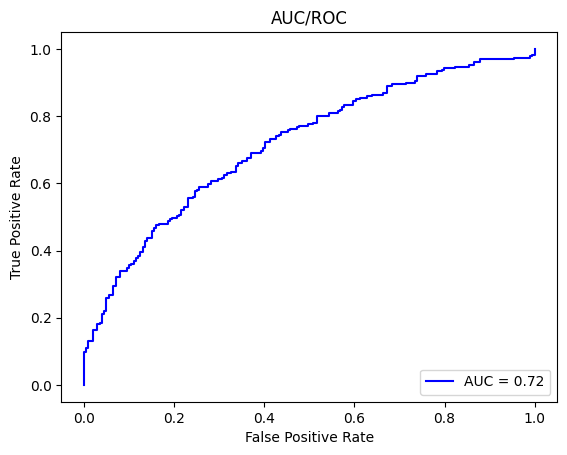

In [28]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values=clf.predict_proba(X_test_filtered)

In [30]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
clf_kappa=knn_kappa_train
clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
clf_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[125  74]
 [ 72 155]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6345    0.6281    0.6313       199
           1     0.6769    0.6828    0.6798       227

    accuracy                         0.6573       426
   macro avg     0.6557    0.6555    0.6556       426
weighted avg     0.6571    0.6573    0.6572       426



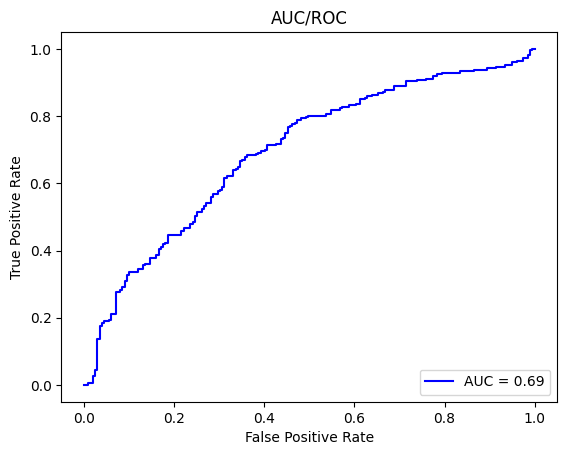

In [31]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [32]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values=mlp.predict_proba(X_test_filtered)

In [33]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)
mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
mlp_kappa=knn_kappa_train
mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
mlp_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[127  72]
 [ 88 139]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5907    0.6382    0.6135       199
           1     0.6588    0.6123    0.6347       227

    accuracy                         0.6244       426
   macro avg     0.6247    0.6253    0.6241       426
weighted avg     0.6270    0.6244    0.6248       426



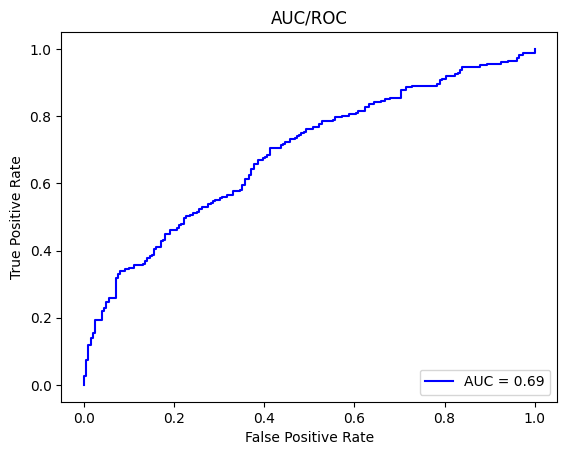

In [34]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values=etc.predict_proba(X_test_filtered)

In [36]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)
etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
etc_kappa=knn_kappa_train
etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
etc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[138  61]
 [ 73 154]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6540    0.6935    0.6732       199
           1     0.7163    0.6784    0.6968       227

    accuracy                         0.6854       426
   macro avg     0.6852    0.6859    0.6850       426
weighted avg     0.6872    0.6854    0.6858       426



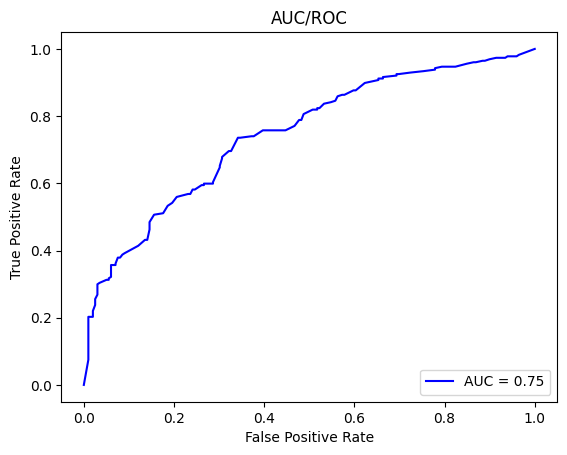

In [37]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [38]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)
y_prediction_values=dtc.predict_proba(X_test_filtered)
                            

In [39]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)
dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
dtc_kappa=knn_kappa_train
dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
dtc_kappa=knn_kappa_test
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[117  82]
 [ 64 163]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6464    0.5879    0.6158       199
           1     0.6653    0.7181    0.6907       227

    accuracy                         0.6573       426
   macro avg     0.6559    0.6530    0.6532       426
weighted avg     0.6565    0.6573    0.6557       426



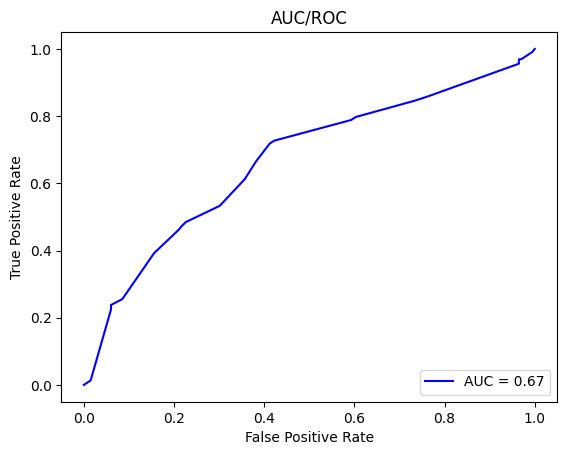

In [40]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)
y_prediction_values=lda.predict_proba(X_test_filtered)
                            

In [42]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)
lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
lda_kappa=knn_kappa_train
lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
lda_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[134  65]
 [ 74 153]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6442    0.6734    0.6585       199
           1     0.7018    0.6740    0.6876       227

    accuracy                         0.6737       426
   macro avg     0.6730    0.6737    0.6731       426
weighted avg     0.6749    0.6737    0.6740       426



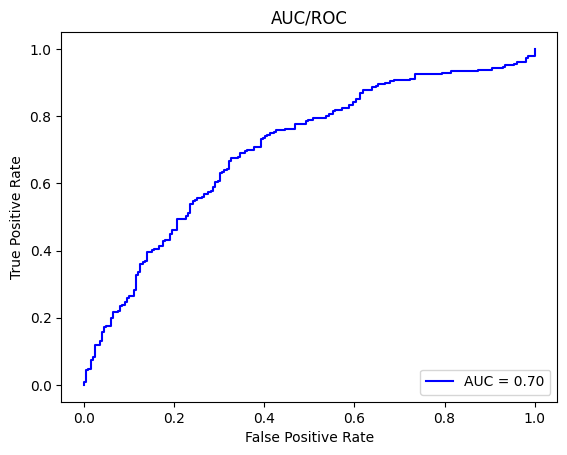

In [43]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [44]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC':[auc_1,auc_2,auc_3,auc_4,auc_5,auc_6,auc_7,auc_8,auc_9,auc_10]}
df_train = pd.DataFrame(data_train)

In [45]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa],
               'AUC/ROC':[auc_1,auc_2,auc_3,auc_4,auc_5,auc_6,auc_7,auc_8,auc_9,auc_10]}
             
             
df_test = pd.DataFrame(data_test)             

In [46]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC
0,RFC,76.277158,0.524986,0.762467,0.766629,0.775371,0.524950,0.721736
1,KNN,76.335878,0.526221,0.762666,0.758170,0.793615,0.525608,0.709760
2,SVC,73.576042,0.471587,0.734236,0.723560,0.787913,0.469590,0.719633
3,LR,68.232531,0.363636,0.680994,0.679487,0.725200,0.362757,0.703141
4,XGB,99.001762,0.980031,0.990007,0.987528,0.993158,0.980014,0.716224
5,GNB,65.942454,0.317728,0.657397,0.655172,0.714937,0.316312,0.693600
6,MLP,76.746917,0.534771,0.767347,0.778035,0.767389,0.534717,0.688177
7,ETC,99.706400,0.994124,0.997061,0.997717,0.996579,0.994123,0.746663
8,DTC,72.636524,0.457392,0.722099,0.698168,0.825542,0.449137,0.666781
9,LDA,68.173811,0.362479,0.680331,0.678381,0.726340,0.361511,0.702389


In [47]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC
0,RFC,66.901408,0.336278,0.668046,0.693694,0.678414,0.336185,0.721736
1,KNN,65.492958,0.307539,0.653737,0.678571,0.669604,0.307509,0.709760
2,SVC,66.197183,0.321908,0.660896,0.686099,0.674009,0.321851,0.719633
3,LR,66.901408,0.337866,0.668486,0.699074,0.665198,0.337415,0.703141
4,XGB,65.727700,0.312982,0.656361,0.683258,0.665198,0.312858,0.716224
5,GNB,65.727700,0.311167,0.655569,0.676856,0.682819,0.311153,0.693600
6,MLP,62.441315,0.249995,0.624115,0.658768,0.612335,0.249290,0.688177
7,ETC,68.544601,0.371094,0.685002,0.716279,0.678414,0.370504,0.746663
8,DTC,65.727700,0.308845,0.653234,0.665306,0.718062,0.307718,0.666781
9,LDA,67.370892,0.346720,0.673059,0.701835,0.674009,0.307509,0.702389
